In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("nikeshreddypatlolla/mimic-cxr-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'mimic-cxr-dataset' dataset.
Path to dataset files: /kaggle/input/mimic-cxr-dataset


In [ ]:
import os

base = path

print("Files/folders inside base path:")
print(os.listdir(base))


Files/folders inside base path:
['mimic-cxr-dataset']


In [ ]:
import os

BASE_PATH = os.path.join(path, "mimic-cxr-reports/files")
IMG_PATH  = os.path.join(path, "mimic-cxr-jpg")   # or check actual folder name
META_PATH = os.path.join(path, "mimic-cxr-metadata.csv")

print("Reports:", BASE_PATH)
print("Images:", IMG_PATH)
print("Metadata:", META_PATH)


Reports: /kaggle/input/mimic-cxr-dataset/mimic-cxr-reports/files
Images: /kaggle/input/mimic-cxr-dataset/mimic-cxr-jpg
Metadata: /kaggle/input/mimic-cxr-dataset/mimic-cxr-metadata.csv


In [ ]:
import pandas as pd

meta_csv = os.path.join(base,"mimic-cxr-dataset/metadata.csv")
df_meta = pd.read_csv(meta_csv)

print("Metadata shape:", df_meta.shape)
print(df_meta.head())
print(df_meta.columns)

Metadata shape: (86565, 12)
                                       dicom_id  subject_id  study_id  \
0  02aa804e-bde0afdd-112c0b34-7bc16630-4e384014    10000032  50414267   
1  174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962    10000032  50414267   
2  2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab    10000032  53189527   
3  e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c    10000032  53189527   
4  68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714    10000032  53911762   

  PerformedProcedureStepDescription ViewPosition  Rows  Columns  StudyDate  \
0                CHEST (PA AND LAT)           PA  3056     2544   21800506   
1                CHEST (PA AND LAT)      LATERAL  3056     2544   21800506   
2                CHEST (PA AND LAT)           PA  3056     2544   21800626   
3                CHEST (PA AND LAT)      LATERAL  3056     2544   21800626   
4               CHEST (PORTABLE AP)           AP  2705     2539   21800723   

    StudyTime ProcedureCodeSequence_CodeMeaning ViewCodeSequence

In [ ]:
print("Columns:", df_meta.columns.tolist())


Columns: ['dicom_id', 'subject_id', 'study_id', 'PerformedProcedureStepDescription', 'ViewPosition', 'Rows', 'Columns', 'StudyDate', 'StudyTime', 'ProcedureCodeSequence_CodeMeaning', 'ViewCodeSequence_CodeMeaning', 'PatientOrientationCodeSequence_CodeMeaning']


In [ ]:
import os

# Set correct roots
REPORTS_ROOT = os.path.join(base, "mimic-cxr-reports/files")
IMAGES_ROOT  = os.path.join(base, "mimic-cxr-jpg")

# Build report path
def get_report_path(row):
    return os.path.join(
        REPORTS_ROOT,
        f"p{str(row['subject_id'])[:2]}",   # first two digits
        f"p{row['subject_id']}",            # subject folder
        f"s{row['study_id']}.txt"           # study file
    )

# Build image path
def get_image_path(row):
    return os.path.join(
        IMAGES_ROOT,
        f"p{str(row['subject_id'])[:2]}",
        f"p{row['subject_id']}",
        f"s{row['study_id']}",
        f"{row['dicom_id']}.jpg"
    )

# Apply to dataframe
df_meta["report_path"] = df_meta.apply(get_report_path, axis=1)
df_meta["image_path"]  = df_meta.apply(get_image_path, axis=1)

# Show sample
print(df_meta[["dicom_id", "subject_id", "study_id", "image_path", "report_path"]].head())


                                       dicom_id  subject_id  study_id  \
0  02aa804e-bde0afdd-112c0b34-7bc16630-4e384014    10000032  50414267   
1  174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962    10000032  50414267   
2  2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab    10000032  53189527   
3  e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c    10000032  53189527   
4  68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714    10000032  53911762   

                                          image_path  \
0  /kaggle/input/mimic-cxr-dataset/mimic-cxr-jpg/...   
1  /kaggle/input/mimic-cxr-dataset/mimic-cxr-jpg/...   
2  /kaggle/input/mimic-cxr-dataset/mimic-cxr-jpg/...   
3  /kaggle/input/mimic-cxr-dataset/mimic-cxr-jpg/...   
4  /kaggle/input/mimic-cxr-dataset/mimic-cxr-jpg/...   

                                         report_path  
0  /kaggle/input/mimic-cxr-dataset/mimic-cxr-repo...  
1  /kaggle/input/mimic-cxr-dataset/mimic-cxr-repo...  
2  /kaggle/input/mimic-cxr-dataset/mimic-cxr-repo...  
3  /

In [ ]:
import os
import pandas as pd

# Filter rows where report exists
df_meta['report_exists'] = df_meta['report_path'].apply(lambda x: os.path.exists(x))
df_meta= df_meta[df_meta['report_exists']]

print(f"Remaining records with valid reports: {len(df_meta)}")


Remaining records with valid reports: 0


In [ ]:
import os

subfolder = os.path.join(base, "mimic-cxr-dataset")

# Check available files
files = os.listdir(subfolder)
print("Files inside subfolder:", files)


Files inside subfolder: ['mimic-cxr-reports', 'official_data_iccv_final', 'metadata.csv']


In [ ]:
import os

reports_folder = os.path.join(subfolder, "mimic-cxr-reports")
report_files = os.listdir(reports_folder)

print("Subfolder for the reports directory:", len(report_files))
print(os.listdir(reports_folder))


Subfolder for the reports directory: 1
['files']


In [ ]:
REPORT_PATH = os.path.join(base,'mimic-cxr-dataset', "mimic-cxr-reports", "files")
IMAGE_PATH = os.path.join(base, 'mimic-cxr-dataset', "official_data_iccv_final", "files")
META_PATH = os.path.join(base, 'mimic-cxr-dataset', "mimic-cxr-metadata.csv")
print(REPORT_PATH)
print(IMAGE_PATH)
print(META_PATH)

/kaggle/input/mimic-cxr-dataset/mimic-cxr-dataset/mimic-cxr-reports/files
/kaggle/input/mimic-cxr-dataset/mimic-cxr-dataset/official_data_iccv_final/files
/kaggle/input/mimic-cxr-dataset/mimic-cxr-dataset/mimic-cxr-metadata.csv


In [ ]:
report_dirs = os.listdir(REPORT_PATH)

print("Number of patient folders:", len(report_dirs))
print("Sample patient folders:", report_dirs[:])


Number of patient folders: 10
Sample patient folders: ['p18', 'p17', 'p10', 'p12', 'p15', 'p19', 'p11', 'p16', 'p13', 'p14']


In [ ]:
sample_patient_prefix = os.path.join(REPORT_PATH, report_dirs[0])
patients_in_category = os.listdir(sample_patient_prefix)

print("Considering a sample_patient_prefix: ", sample_patient_prefix[-3:])
print("Number of patients in this category:", len(patients_in_category))
print(os.listdir(sample_patient_prefix))

Considering a sample_patient_prefix:  p18
Number of patients in this category: 1500
['p18488823', 'p18072714', 'p18308687', 'p18353394', 'p18362159', 'p18026603', 'p18136485', 'p18352952', 'p18859364', 'p18832012', 'p18186439', 'p18988595', 'p18025233', 'p18773317', 'p18907470', 'p18724720', 'p18611996', 'p18009005', 'p18232511', 'p18033257', 'p18092188', 'p18652728', 'p18646710', 'p18341503', 'p18942559', 'p18702043', 'p18978545', 'p18179234', 'p18092696', 'p18458646', 'p18616499', 'p18926021', 'p18706064', 'p18298936', 'p18045423', 'p18953418', 'p18643174', 'p18645118', 'p18933476', 'p18796351', 'p18605680', 'p18152226', 'p18895472', 'p18497379', 'p18233262', 'p18738310', 'p18713769', 'p18281543', 'p18869870', 'p18016258', 'p18290366', 'p18552808', 'p18828209', 'p18561321', 'p18508479', 'p18273212', 'p18391806', 'p18825761', 'p18763495', 'p18303550', 'p18976991', 'p18130172', 'p18408483', 'p18754310', 'p18201438', 'p18777971', 'p18694070', 'p18160228', 'p18408877', 'p18403538', 'p184

In [ ]:
sample_patient = os.path.join(sample_patient_prefix, patients_in_category[0])
study_files = os.listdir(sample_patient)

print("Files inside study:", study_files)
print("For this patient there were 2 studies taken (possibly at different times), and their corresponding reports are shown above.")

Files inside study: ['s59858156.txt', 's57270277.txt']
For this patient there were 2 studies taken (possibly at different times), and their corresponding reports are shown above.


In [ ]:
sample_report_path = os.path.join(sample_patient, study_files[0])

with open(sample_report_path, "r") as f:
    report_text = f.read()

print(f"Opening sample report {study_files[0]} for patient {patients_in_category[0]}:\n\n\n{report_text[:1000]}")


Opening sample report s59858156.txt for patient p18488823:


                                 FINAL REPORT
 EXAMINATION:  CHEST (PA AND LAT)
 
 INDICATION:  ___ year old woman with RLL PNA  // eval resolution      eval
 resolution
 
 COMPARISON:  A chest radiographs ___ and ___.
 
 IMPRESSION: 
 
 The subtle increase in radiodensity over the lower spine seen on the lateral
 view on ___ is not clearly changed from ___ and looks pretty much
 the same today.  I can't say that I see a focus of pneumonia; if any is
 present it is quite small.
 
 Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.



In [ ]:
print(os.listdir(REPORT_PATH))

['p18', 'p17', 'p10', 'p12', 'p15', 'p19', 'p11', 'p16', 'p13', 'p14']


In [ ]:
os.listdir(IMAGE_PATH)

['p18', 'p17', 'p10', 'p12', 'p15', 'p19', 'p11', 'p16', 'p13', 'p14']

# **Storing all reports, image paths, patient Ids and Study Ids**

In [ ]:
import os
import pandas as pd

all_reports = []
all_report_paths = []
all_image_paths = []
all_patient_ids = []
all_study_ids = []

for pid in os.listdir(REPORT_PATH):  # REPORT_PATH = mimic-cxr-reports/files
    pid_path = os.path.join(REPORT_PATH, pid)
    if not os.path.isdir(pid_path):
        continue

    for patient in os.listdir(pid_path):  # e.g., p11013572
        patient_path = os.path.join(pid_path, patient)
        if not os.path.isdir(patient_path):
            continue
        # print(patient_path)

        for study_file in os.listdir(patient_path):  # e.g., s50771383.txt
            if study_file.endswith(".txt"):
                report_path = os.path.join(patient_path, study_file)
                study_id = study_file[:-4]  # remove '.txt'
                # print(study_id)

                # Build corresponding image folder path
                image_folder_path = os.path.join(
                    IMAGE_PATH,  # /mimic-cxr-dataset/official_data_iccv_final/files
                    pid,
                    patient,
                    study_id
                )
                # print(image_folder_path)

                # Only proceed if image folder exists
                if os.path.exists(image_folder_path):
                    # print('im here')
                    image_files = [f for f in os.listdir(image_folder_path) if f.lower().endswith('.jpg')]
                    for image_file in image_files:
                        image_path = os.path.join(image_folder_path, image_file)
                        # print(image_path)

                        with open(report_path, "r") as f:
                            report_text = f.read()

                        all_reports.append(report_text)
                        all_report_paths.append(report_path)
                        all_image_paths.append(image_path)
                        all_patient_ids.append(patient)
                        all_study_ids.append(study_id)

print(f"\nTotal valid (image + report) pairs: {len(all_reports)}")
print(f"\nSample report text:\n{all_reports[0][:500]}")
print(f"\nSample image path:\n{all_image_paths[0]}")



Total valid (image + report) pairs: 86565

Sample report text:
                                 FINAL REPORT
 EXAMINATION:  CHEST (PA AND LAT)
 
 INDICATION:  ___ year old woman with RLL PNA  // eval resolution      eval
 resolution
 
 COMPARISON:  A chest radiographs ___ and ___.
 
 IMPRESSION: 
 
 The subtle increase in radiodensity over the lower spine seen on the lateral
 view on ___ is not clearly changed from ___ and looks pretty much
 the same today.  I can't say that I see a focus of pneumonia; if any is
 present it is quite small.
 
 Cardiomediasti

Sample image path:
/kaggle/input/mimic-cxr-dataset/mimic-cxr-dataset/official_data_iccv_final/files/p18/p18488823/s59858156/2416734c-5bb07eb3-0695abeb-38b7276d-ae55e665.jpg


# **Analyzing the reports**

In [ ]:
print(f"Total number of (image + report) pairs: {len(all_reports)}")
print(f"Total number of unique patients: {len(set(all_patient_ids))}")
print(f"Total number of unique studies: {len(set(all_study_ids))}")


Total number of (image + report) pairs: 86565
Total number of unique patients: 15000
Total number of unique studies: 52434


# **Report Length Analysis**

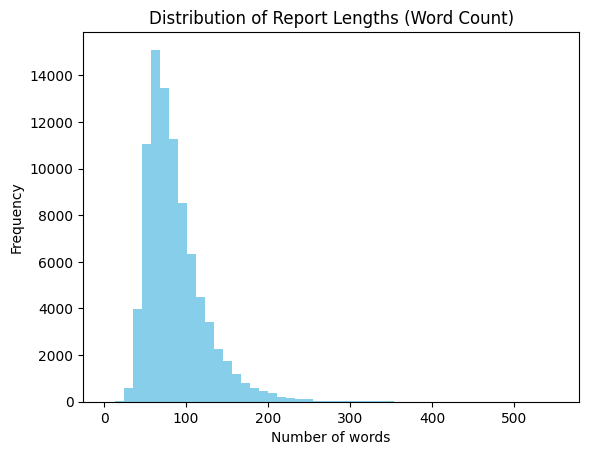

Average report length (words): 85.92
Minimum report length: 2 words
Maximum report length: 552 words


In [ ]:
report_lengths = [len(r.split()) for r in all_reports]

import matplotlib.pyplot as plt

plt.hist(report_lengths, bins=50, color='skyblue')
plt.title('Distribution of Report Lengths (Word Count)')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

print(f"Average report length (words): {sum(report_lengths) / len(report_lengths):.2f}")
print(f"Minimum report length: {min(report_lengths)} words")
print(f"Maximum report length: {max(report_lengths)} words")

# **Most Frequent Words (after removing stopwords)**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


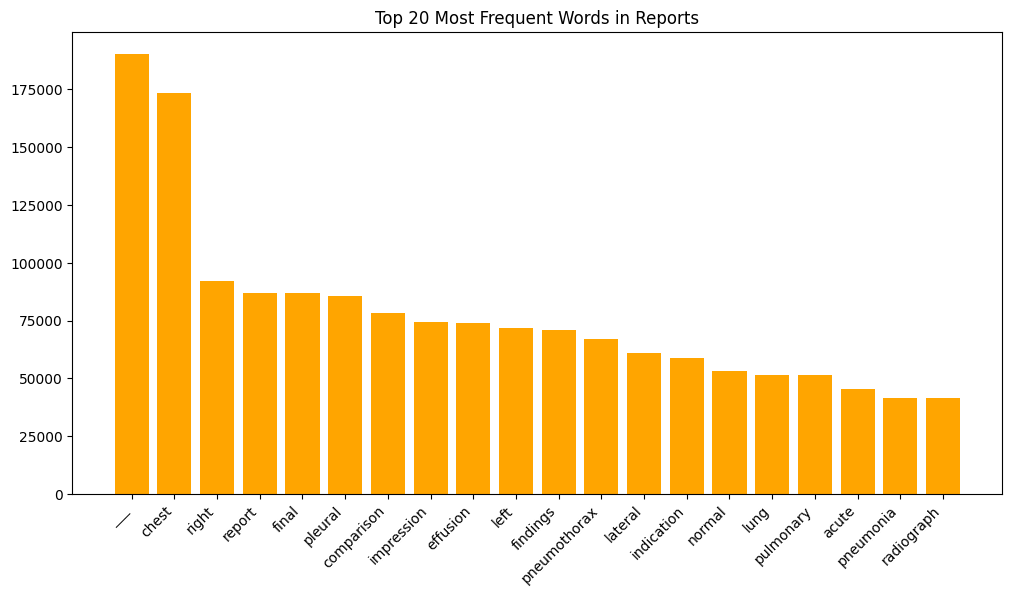

In [ ]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

all_words = []
for text in all_reports:
    words = re.findall(r'\b\w+\b', text.lower())
    words = [w for w in words if w not in stop_words and len(w) > 2]
    all_words.extend(words)

word_freq = Counter(all_words)
most_common = word_freq.most_common(20)

words, counts = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words in Reports')
plt.show()

# **Extracting the Findings**

In [ ]:
import re

def extract_findings(report):
    findings = []
    # Capture FINDINGS section
    match_f = re.search(r"FINDINGS:(.*?)(IMPRESSION:|$)", report, re.S | re.I)
    if match_f:
        findings.append(match_f.group(1).strip())
    # Capture IMPRESSION section
    match_i = re.search(r"IMPRESSION:(.*)", report, re.S | re.I)
    if match_i:
        findings.append(match_i.group(1).strip())
    return " ".join(findings)

processed_reports = [extract_findings(r) for r in all_reports]
print("Sample extracted findings:\n", processed_reports[0][:300])


Sample extracted findings:
 The subtle increase in radiodensity over the lower spine seen on the lateral
 view on ___ is not clearly changed from ___ and looks pretty much
 the same today.  I can't say that I see a focus of pneumonia; if any is
 present it is quite small.
 
 Cardiomediastinal and hilar silhouettes and pleural 


In [ ]:
findings_list = [
    "cardiomegaly", "pleural effusion", "consolidation", "atelectasis", "pneumothorax",
    "normal heart", "normal lungs", "opacity", "emphysema", "enlarged heart",
    "effusion", "infiltrate", "mass", "nodule", "edema"
]


In [ ]:
processed_reports[:5]

["The subtle increase in radiodensity over the lower spine seen on the lateral\n view on ___ is not clearly changed from ___ and looks pretty much\n the same today.  I can't say that I see a focus of pneumonia; if any is\n present it is quite small.\n \n Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.",
 "The subtle increase in radiodensity over the lower spine seen on the lateral\n view on ___ is not clearly changed from ___ and looks pretty much\n the same today.  I can't say that I see a focus of pneumonia; if any is\n present it is quite small.\n \n Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.",
 'There is subtle opacity overlying the spine at the lung base on lateral view,\n which may be early bronchopneumonia.  The faint opacity at the right bilateral\n lung base near the costophrenic angle may be a corresponding finding on\n frontal view.\n There is no  pleural effusion or pneumothorax.  Cardiomediastinal and hilar\n silhouett

In [ ]:
processed_reports[0]

"The subtle increase in radiodensity over the lower spine seen on the lateral\n view on ___ is not clearly changed from ___ and looks pretty much\n the same today.  I can't say that I see a focus of pneumonia; if any is\n present it is quite small.\n \n Cardiomediastinal and hilar silhouettes and pleural surfaces are normal."

# **Creating the text corpus**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
corpus_save_path = '/content/drive/MyDrive/MyData/findings_corpus.txt'

In [ ]:
with open(corpus_save_path, 'w') as f:
    for text in processed_reports:
        f.write(text.lower() + '\n')

In [ ]:
print(os.path.exists(corpus_save_path))  # Should print True
print(f"Saved corpus at: {corpus_save_path}")

True
Saved corpus at: /content/drive/MyDrive/MyData/findings_corpus.txt


# **Using the sentence peice tool to extract nouns**

In [ ]:
!pip install sentencepiece

In [ ]:
import sentencepiece as spm

spm.SentencePieceTrainer.train(
    input='/content/drive/MyDrive/MyData/findings_corpus.txt',
    model_prefix='/content/drive/MyDrive/MyData/findings_spm',
    vocab_size=5000,
    model_type='unigram'
)

In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('/content/drive/MyDrive/MyData/findings_spm.model')

True

# Without removing stopwords



In [ ]:
from collections import Counter

all_subwords = []

for text in processed_reports:
    tokens = sp.encode(text.lower(), out_type=str)
    all_subwords.extend(tokens)

subword_freq = Counter(all_subwords)
common_subwords = [word for word, _ in subword_freq.most_common(50)]

print(f"Top 10 frequent subwords:\n{common_subwords[:10]}")

Top 10 frequent subwords:
['.', '▁the', '▁is', '▁no', '▁of', ',', '▁and', '▁are', '▁in', '▁right']


# After removing stopwords

In [ ]:
from nltk.corpus import stopwords
import string
import re
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_subwords = []

for text in processed_reports:
    tokens = sp.encode(text.lower(), out_type=str)
    for token in tokens:
        token_clean = token.replace('▁', '').strip()
        if (token_clean not in stop_words) and (token_clean not in string.punctuation) and len(token_clean) > 2:
            filtered_subwords.append(token_clean)

subword_freq = Counter(filtered_subwords)
common_subwords = [word for word, _ in subword_freq.most_common(50)]

print(f"Top 10 meaningful frequent subwords:\n{common_subwords[:10]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 meaningful frequent subwords:
['right', 'pleural', 'effusion', 'left', 'pneumothorax', 'normal', 'lung', 'pulmonary', 'chest', 'acute']


# We must take these words that are already not included in the findings_list list

In [ ]:
existing_report_labels = set()
for label in findings_list:
  words = label.split(" ")
  for word in words:
    existing_report_labels.add(word)

In [ ]:
existing_report_labels

{'atelectasis',
 'cardiomegaly',
 'consolidation',
 'edema',
 'effusion',
 'emphysema',
 'enlarged',
 'heart',
 'infiltrate',
 'lungs',
 'mass',
 'nodule',
 'normal',
 'opacity',
 'pleural',
 'pneumothorax'}

In [ ]:
subword_freq

Counter({'subtle': 1941,
         'increase': 2646,
         'radiodensity': 178,
         'lower': 20219,
         'spine': 5341,
         'seen': 33019,
         'lateral': 22604,
         'view': 7393,
         '___': 17327,
         'clearly': 708,
         'changed': 1765,
         'looks': 45,
         'pre': 1364,
         'much': 435,
         'today': 913,
         'say': 34,
         'see': 360,
         'focus': 457,
         'pneumonia': 24232,
         'present': 8121,
         'quite': 199,
         'small': 19045,
         'ardiomediastinal': 21054,
         'hilar': 18829,
         'silhouettes': 5104,
         'pleural': 73704,
         'surfaces': 1923,
         'normal': 49088,
         'opacity': 16855,
         'overlying': 2312,
         'lung': 43601,
         'base': 9765,
         'may': 9376,
         'early': 1246,
         'bronchopneumonia': 64,
         'faint': 345,
         'right': 76815,
         'bilateral': 13117,
         'near': 622,
         'cost

In [ ]:
filtered_subword_freq = Counter({
    word: count for word, count in subword_freq.items()
    if word.isalpha() and word not in existing_report_labels
})

common_subwords = [word for word, _ in filtered_subword_freq.most_common(50)]

print(f"Top 10 filtered common subwords:\n{common_subwords[:10]}")

Top 10 filtered common subwords:
['right', 'left', 'lung', 'pulmonary', 'chest', 'acute', 'seen', 'clear', 'unchanged', 'silhouette']


In [ ]:
filtered_subword_freq

Counter({'subtle': 1941,
         'increase': 2646,
         'radiodensity': 178,
         'lower': 20219,
         'spine': 5341,
         'seen': 33019,
         'lateral': 22604,
         'view': 7393,
         'clearly': 708,
         'changed': 1765,
         'looks': 45,
         'pre': 1364,
         'much': 435,
         'today': 913,
         'say': 34,
         'see': 360,
         'focus': 457,
         'pneumonia': 24232,
         'present': 8121,
         'quite': 199,
         'small': 19045,
         'ardiomediastinal': 21054,
         'hilar': 18829,
         'silhouettes': 5104,
         'surfaces': 1923,
         'overlying': 2312,
         'lung': 43601,
         'base': 9765,
         'may': 9376,
         'early': 1246,
         'bronchopneumonia': 64,
         'faint': 345,
         'right': 76815,
         'bilateral': 13117,
         'near': 622,
         'costophrenic': 3031,
         'angle': 2095,
         'corresponding': 231,
         'finding': 741,
      

# Code to Pick Top-k Based on Cumulative Frequency

In [ ]:
total_count = sum(filtered_subword_freq.values())
cumulative_count = 0
common_subwords = []

for word, count in filtered_subword_freq.most_common():
    common_subwords.append(word)
    cumulative_count += count
    coverage = cumulative_count / total_count

    # Stop when reaching ~75% coverage or after 30 subwords (whichever comes first)
    if coverage >= 0.75 or len(common_subwords) >= 30:
        break

print(f"Selected top {len(common_subwords)} common subwords covering ~{coverage*100:.2f}% of occurrences.")
print(f"Example subwords:\n{common_subwords[:10]}")


Selected top 30 common subwords covering ~32.81% of occurrences.
Example subwords:
['right', 'left', 'lung', 'pulmonary', 'chest', 'acute', 'seen', 'clear', 'unchanged', 'silhouette']


In [ ]:
node_words = findings_list + common_subwords
node_words

['cardiomegaly',
 'pleural effusion',
 'consolidation',
 'atelectasis',
 'pneumothorax',
 'normal heart',
 'normal lungs',
 'opacity',
 'emphysema',
 'enlarged heart',
 'effusion',
 'infiltrate',
 'mass',
 'nodule',
 'edema',
 'right',
 'left',
 'lung',
 'pulmonary',
 'chest',
 'acute',
 'seen',
 'clear',
 'unchanged',
 'silhouette',
 'focal',
 'size',
 'mediastinal',
 'mild',
 'pneumonia',
 'lateral',
 'cardiac',
 'contours',
 'ardiomediastinal',
 'lower',
 'evidence',
 'process',
 'cardiopulmonary',
 'small',
 'tube',
 'hilar',
 'stable',
 'prior',
 'upper',
 'lobe']

In [ ]:
len(node_words)

45

In [ ]:
processed_reports

["The subtle increase in radiodensity over the lower spine seen on the lateral\n view on ___ is not clearly changed from ___ and looks pretty much\n the same today.  I can't say that I see a focus of pneumonia; if any is\n present it is quite small.\n \n Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.",
 "The subtle increase in radiodensity over the lower spine seen on the lateral\n view on ___ is not clearly changed from ___ and looks pretty much\n the same today.  I can't say that I see a focus of pneumonia; if any is\n present it is quite small.\n \n Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.",
 'There is subtle opacity overlying the spine at the lung base on lateral view,\n which may be early bronchopneumonia.  The faint opacity at the right bilateral\n lung base near the costophrenic angle may be a corresponding finding on\n frontal view.\n There is no  pleural effusion or pneumothorax.  Cardiomediastinal and hilar\n silhouett

In [ ]:
import re

cleaned_reports = []
for report in processed_reports:
    # Remove newlines, extra spaces
    report = re.sub(r'\s+', ' ', report).strip()
    # Optional: lowercase
    report = report.lower()
    cleaned_reports.append(report)


In [ ]:
cleaned_reports

["the subtle increase in radiodensity over the lower spine seen on the lateral view on ___ is not clearly changed from ___ and looks pretty much the same today. i can't say that i see a focus of pneumonia; if any is present it is quite small. cardiomediastinal and hilar silhouettes and pleural surfaces are normal.",
 "the subtle increase in radiodensity over the lower spine seen on the lateral view on ___ is not clearly changed from ___ and looks pretty much the same today. i can't say that i see a focus of pneumonia; if any is present it is quite small. cardiomediastinal and hilar silhouettes and pleural surfaces are normal.",
 'there is subtle opacity overlying the spine at the lung base on lateral view, which may be early bronchopneumonia. the faint opacity at the right bilateral lung base near the costophrenic angle may be a corresponding finding on frontal view. there is no pleural effusion or pneumothorax. cardiomediastinal and hilar silhouettes are normal size. possible early pn

In [ ]:
report_labels = []

for report in cleaned_reports:
    findings_in_report = [word for word in node_words if word.lower() in report]
    report_labels.append(findings_in_report)
report_labels

[['seen',
  'clear',
  'silhouette',
  'mediastinal',
  'pneumonia',
  'lateral',
  'ardiomediastinal',
  'lower',
  'small',
  'hilar'],
 ['seen',
  'clear',
  'silhouette',
  'mediastinal',
  'pneumonia',
  'lateral',
  'ardiomediastinal',
  'lower',
  'small',
  'hilar'],
 ['pleural effusion',
  'pneumothorax',
  'opacity',
  'effusion',
  'right',
  'lung',
  'silhouette',
  'size',
  'mediastinal',
  'pneumonia',
  'lateral',
  'ardiomediastinal',
  'lower',
  'hilar',
  'lobe'],
 ['pleural effusion',
  'pneumothorax',
  'opacity',
  'effusion',
  'right',
  'lung',
  'silhouette',
  'size',
  'mediastinal',
  'pneumonia',
  'lateral',
  'ardiomediastinal',
  'lower',
  'hilar',
  'lobe'],
 ['consolidation',
  'pneumothorax',
  'effusion',
  'edema',
  'lung',
  'pulmonary',
  'acute',
  'clear',
  'focal',
  'size',
  'process',
  'cardiopulmonary'],
 ['pleural effusion',
  'pneumothorax',
  'effusion',
  'right',
  'lung',
  'pulmonary',
  'chest',
  'clear',
  'mediastinal',
  

# **Constructing Co-occurrance matrix**

In [ ]:
import numpy as np

n = len(node_words)
co_matrix = np.zeros((n, n), dtype=int)
word_to_idx = {word: i for i, word in enumerate(node_words)}

In [ ]:
from itertools import combinations

for findings in report_labels:
    for a, b in combinations(findings, 2):
        i, j = word_to_idx[a], word_to_idx[b]
        co_matrix[i, j] += 1
        co_matrix[j, i] += 1  # symmetric

In [ ]:
co_df = pd.DataFrame(co_matrix, index=node_words, columns=node_words)

In [ ]:
print(co_df.iloc[:10, :10])

                  cardiomegaly  pleural effusion  consolidation  atelectasis  \
cardiomegaly                 0              7414           2820         3513   
pleural effusion          7414                 0          19947        15684   
consolidation             2820             19947              0         6070   
atelectasis               3513             15684           6070            0   
pneumothorax              6116             40483          22665        13667   
normal heart                 6               479            266          139   
normal lungs                 0                 2              2            1   
opacity                   1430              7903           3027         5023   
emphysema                  199              1272            604          560   
enlarged heart              25               132             34           52   

                  pneumothorax  normal heart  normal lungs  opacity  \
cardiomegaly              6116             6    

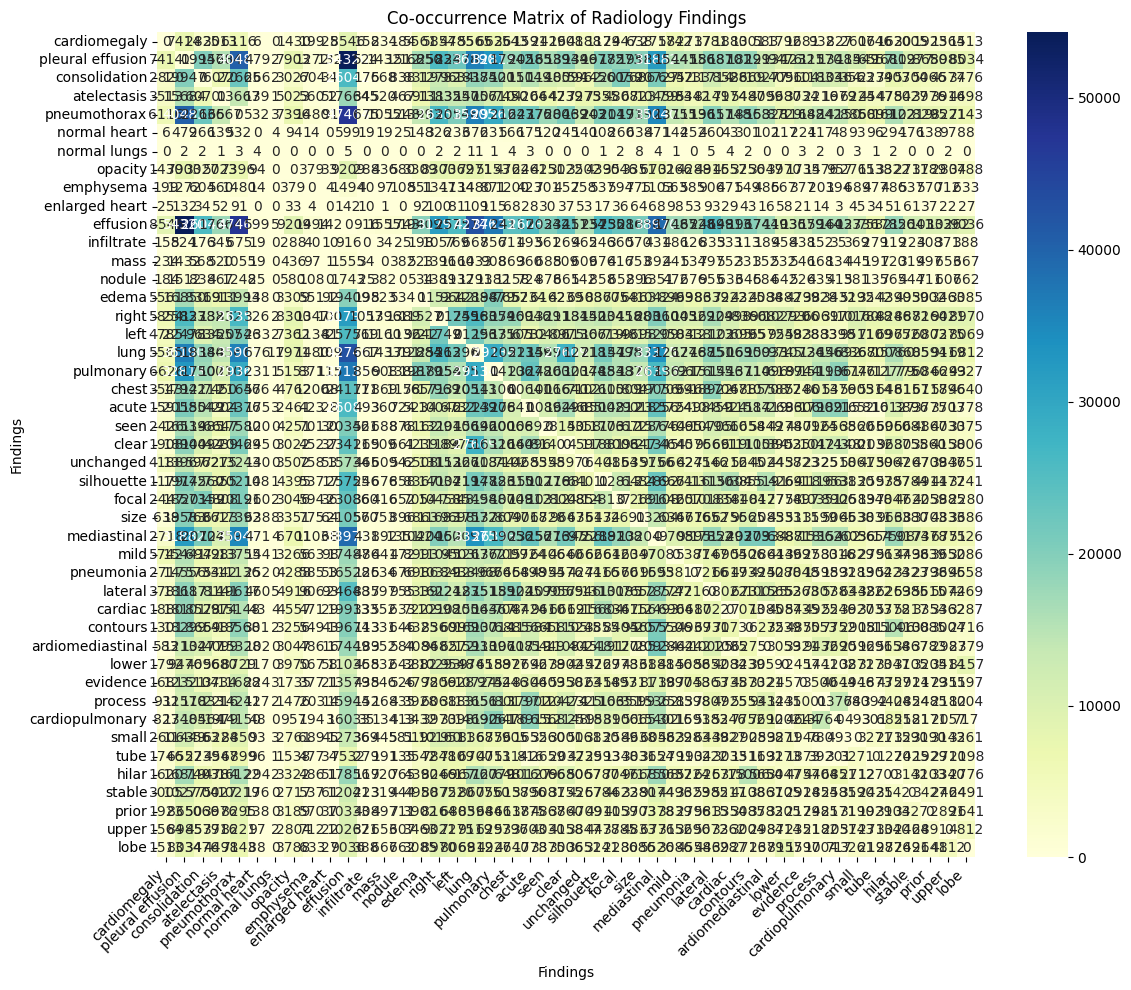

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming co_df is your co-occurrence DataFrame from previous step

plt.figure(figsize=(12, 10))
sns.heatmap(co_df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title("Co-occurrence Matrix of Radiology Findings")
plt.xlabel("Findings")
plt.ylabel("Findings")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
co_matrix = co_df.values

# Compute the threshold: mean of all co-occurrences (excluding diagonal if needed)
# Optionally, exclude diagonal (self-occurrence) from average
n = co_matrix.shape[0]
upper_tri_idx = np.triu_indices(n, k=1)  # only upper triangle without diagonal
threshold = co_matrix[upper_tri_idx].mean()

print("Average co-occurrence (threshold):", threshold)

Average co-occurrence (threshold): 6430.0929292929295


In [ ]:
# Create binary adjacency matrix
adj_matrix = np.zeros_like(co_matrix, dtype=int)
adj_matrix[co_matrix > threshold] = 1

# Make symmetric
adj_matrix = np.maximum(adj_matrix, adj_matrix.T)

# Optional: keep diagonal as 0 (no self-loops)
np.fill_diagonal(adj_matrix, 0)

# Convert to DataFrame for readability
adj_df = pd.DataFrame(adj_matrix, index=co_df.index, columns=co_df.columns)

# Display adjacency matrix
print(adj_df)

                  cardiomegaly  pleural effusion  consolidation  atelectasis  \
cardiomegaly                 0                 1              0            0   
pleural effusion             1                 0              1            1   
consolidation                0                 1              0            0   
atelectasis                  0                 1              0            0   
pneumothorax                 0                 1              1            1   
normal heart                 0                 0              0            0   
normal lungs                 0                 0              0            0   
opacity                      0                 1              0            0   
emphysema                    0                 0              0            0   
enlarged heart               0                 0              0            0   
effusion                     1                 1              1            1   
infiltrate                   0          

Graph has 45 nodes and 374 edges


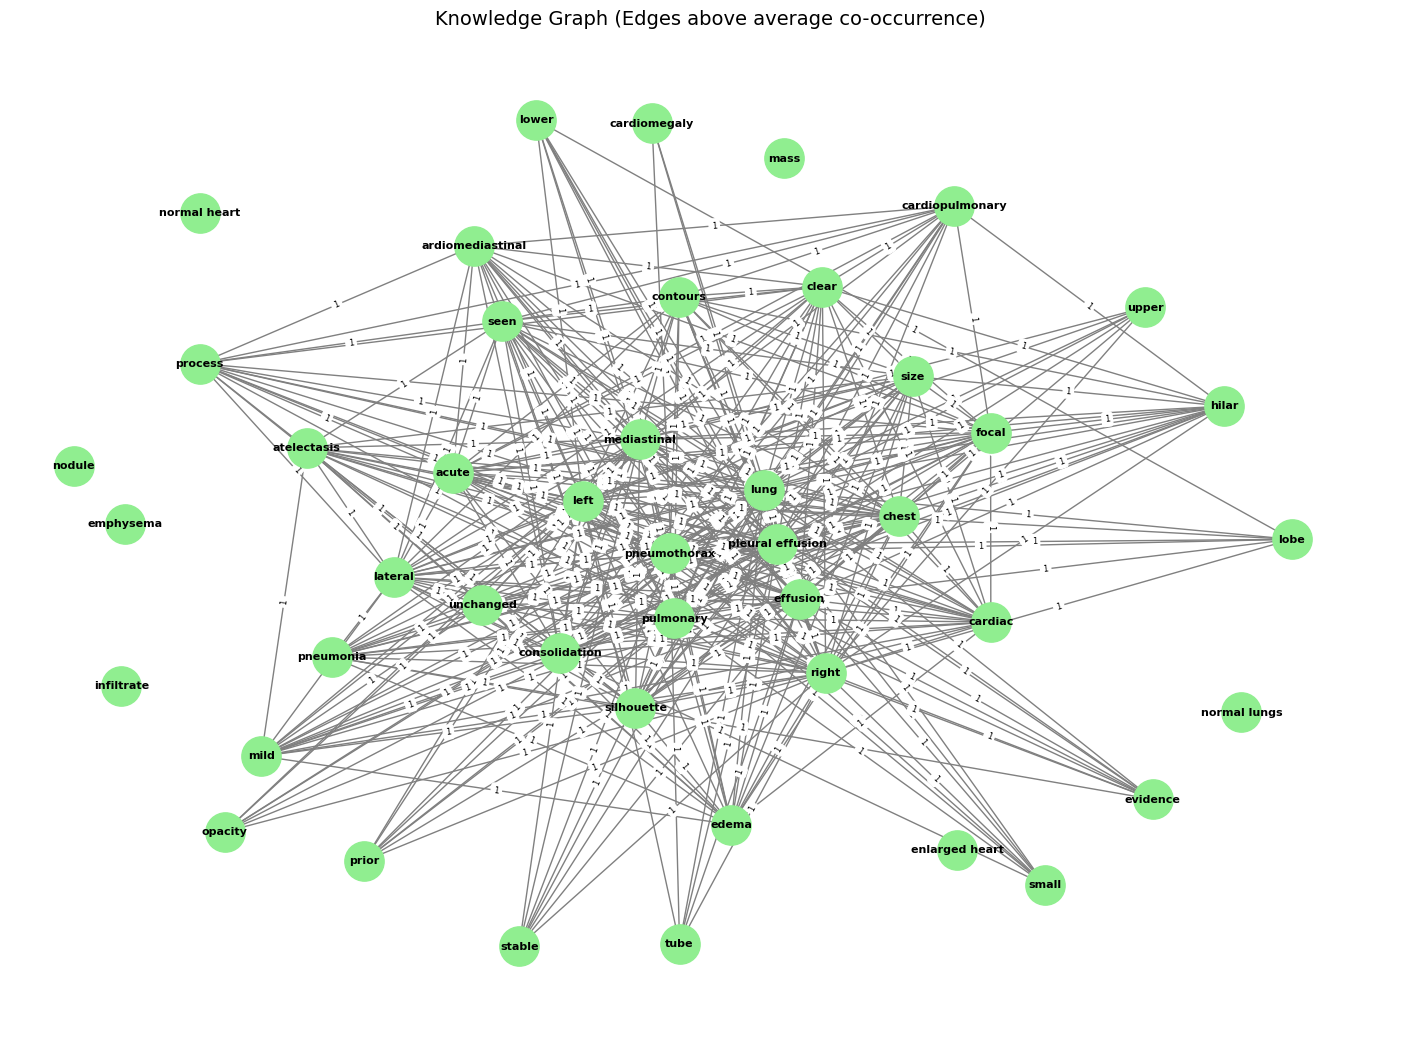

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# adj_df: your binary adjacency DataFrame

# Step 1: Create graph
G = nx.from_pandas_adjacency(adj_df)

print("Graph has", len(G.nodes()), "nodes and", len(G.edges()), "edges")

# Step 2: Layout
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=2.0, seed=42)  # increase k to spread nodes

# Step 3: Draw nodes and edges
nx.draw(
    G, pos,
    with_labels=True,
    node_size=800,          # smaller node circles
    node_color="lightgreen",
    font_size=8,            # smaller font
    font_weight="bold",
    edge_color="gray"
)

# Optional: Draw edge labels (all edges = 1)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Knowledge Graph (Edges above average co-occurrence)", fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
print("Number of isolated nodes:", (adj_df.sum(axis=1)==0).sum())

Number of isolated nodes: 7


Graph after removing isolates has 38 nodes and 374 edges


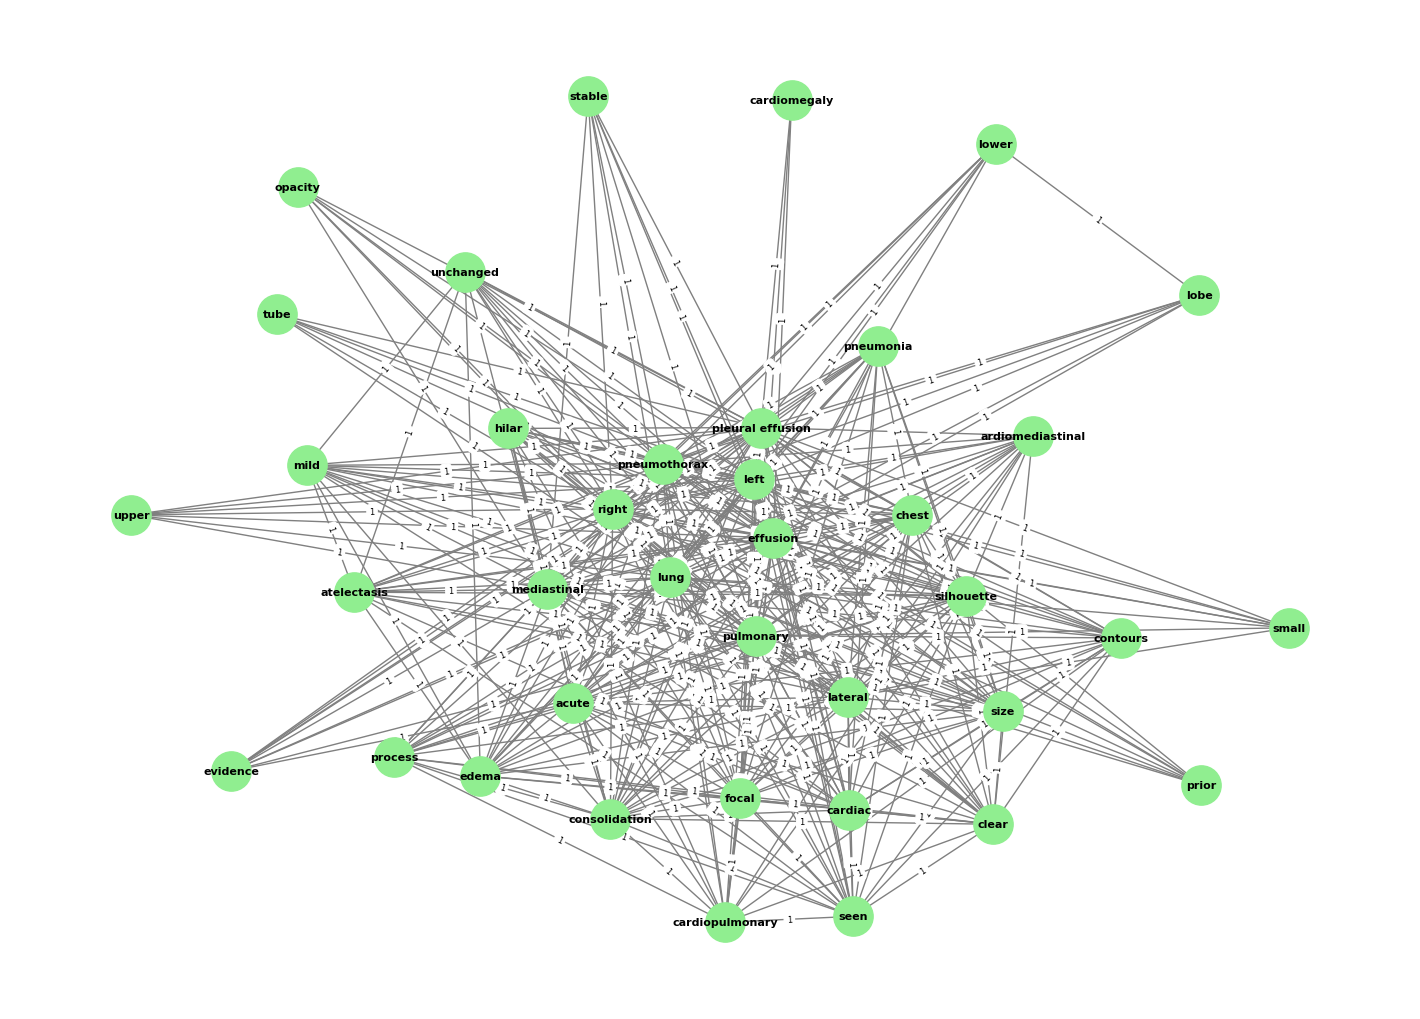

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create graph
G = nx.from_pandas_adjacency(adj_df)

# Step 2: Remove isolated nodes
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

print("Graph after removing isolates has", len(G.nodes()), "nodes and", len(G.edges()), "edges")

# Step 3: (Optional) keep only the largest connected component
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print("Only largest connected component retained:", len(G.nodes()), "nodes")

# Step 4: Layout and draw
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=2.0, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_size=800,
    node_color="lightgreen",
    font_size=8,
    font_weight="bold",
    edge_color="gray"
)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.axis('off')
plt.show()


In [ ]:
adj_df

cardiomegaly  pleural effusion  consolidation  atelectasis  \
cardiomegaly                 0                 1              0            0   
pleural effusion             1                 0              1            1   
consolidation                0                 1              0            0   
atelectasis                  0                 1              0            0   
pneumothorax                 0                 1              1            1   
normal heart                 0                 0              0            0   
normal lungs                 0                 0              0            0   
opacity                      0                 1              0            0   
emphysema                    0                 0              0            0   
enlarged heart               0                 0              0            0   
effusion                     1                 1              1            1   
infiltrate                   0                 0              0            0   
mass                         0                 0              0            0   
nodule                       0                 0              0            0   
edema                        0                 1              1            1   
right                        0                 1              1            1   
left                         0                 1              1            1   
lung                         0                 1              1            1   
pulmonary                    1                 1              1            1   
chest                        0                 1              1            1   
acute                        0                 1              1            0   
seen                         0                 1              1            1   
clear                        0                 1              1            0   
unchanged                    0                 1              0            1   
silhouette                   0                 1              1            1   
focal                        0                 1              1            0   
size                         0                 1              1            1   
mediastinal                  0                 1              1            1   
mild                         0                 1              1            1   
pneumonia                    0                 1              0            0   
lateral                      0                 1              1            1   
cardiac                      0                 1              1            1   
contours                     0                 1              1            0   
ardiomediastinal             0                 1              1            0   
lower                        0                 1              0            0   
evidence                     0                 1              0            0   
process                      0                 1              1            0   
cardiopulmonary              0                 1              1            0   
small                        0                 1              0            0   
tube                         0                 1              0            0   
hilar                        0                 1              1            0   
stable                       0                 1              0            0   
prior                        0                 1              0            0   
upper                        0                 1              0            0   
lobe                         0                 1              0            0   

                  pneumothorax  normal heart  normal lungs  opacity  \
cardiomegaly                 0             0             0        0   
pleural effusion             1             0             0        1   
consolidation                1             0             0        0   
atelectasis                  1             0         

# **Save adj_df as adjacency_matrix.csv into the assets/ folder**